# Early prediction of diabetes mellitus in pregnant woman 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import collections
from collections import Counter

In [3]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\With Smote.csv")
data["class"]

0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
994    tested_positive
995    tested_positive
996    tested_positive
997    tested_positive
998    tested_positive
Name: class, Length: 999, dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    999 non-null    float64
 1   plas    999 non-null    float64
 2   pres    999 non-null    float64
 3   skin    999 non-null    float64
 4   insu    999 non-null    float64
 5   mass    999 non-null    float64
 6   pedi    999 non-null    float64
 7   age     999 non-null    float64
 8   class   999 non-null    object 
dtypes: float64(8), object(1)
memory usage: 70.4+ KB


In [5]:
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.000000,148.000000,72.000000,35.000000,0.00000,33.600000,0.627000,50.000000,tested_positive
1,1.000000,85.000000,66.000000,29.000000,0.00000,26.600000,0.351000,31.000000,tested_negative
2,8.000000,183.000000,64.000000,0.000000,0.00000,23.300000,0.672000,32.000000,tested_positive
3,1.000000,89.000000,66.000000,23.000000,94.00000,28.100000,0.167000,21.000000,tested_negative
4,0.000000,137.000000,40.000000,35.000000,168.00000,43.100000,2.288000,33.000000,tested_positive
...,...,...,...,...,...,...,...,...,...
994,4.112680,128.273325,86.816247,40.561308,99.59885,35.405738,0.326197,36.960990,tested_positive
995,0.887431,128.536006,70.703019,0.000000,0.00000,35.695255,0.614867,48.963615,tested_positive
996,6.736276,189.134854,84.803245,0.000000,0.00000,35.755130,0.201246,61.978155,tested_positive
997,1.532892,164.001414,74.050966,33.355244,0.00000,44.879901,0.396190,32.674601,tested_positive


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["class"] = le.fit_transform(data["class"])
data["class"]

0      1
1      0
2      1
3      0
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: class, Length: 999, dtype: int32

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
smote=SMOTE()

In [9]:
# checking the dataype of the parameters(Columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    999 non-null    float64
 1   plas    999 non-null    float64
 2   pres    999 non-null    float64
 3   skin    999 non-null    float64
 4   insu    999 non-null    float64
 5   mass    999 non-null    float64
 6   pedi    999 non-null    float64
 7   age     999 non-null    float64
 8   class   999 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 66.5 KB


In [10]:
# Descriptive Analysis
data.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,4.080659,125.594523,69.368841,20.857709,84.506083,32.697188,0.488358,34.073874,0.499499
std,3.335427,32.427054,19.762050,16.375532,120.644615,7.451410,0.324436,11.393954,0.500250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,28.400000,0.254769,25.000000,0.000000
50%,3.000000,122.000000,72.000000,24.000000,18.000000,32.800000,0.400000,31.000000,0.000000
75%,6.034432,147.000000,80.000000,33.000000,135.693315,37.010055,0.646500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
mean = data.mean()
mean

preg       4.080659
plas     125.594523
pres      69.368841
skin      20.857709
insu      84.506083
mass      32.697188
pedi       0.488358
age       34.073874
class      0.499499
dtype: float64

In [12]:
# Checking the null values in dataset
data.isnull().any()

preg     False
plas     False
pres     False
skin     False
insu     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [13]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

# Visualization

# Line Plot

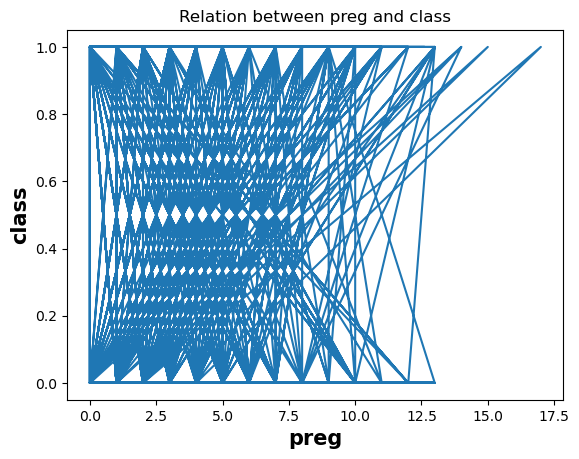

In [14]:
#line Plot
preg = data['preg']
oc = data['class']
plt.title("Relation between preg and class")
plt.xlabel('preg', fontweight ='bold', fontsize = 15)
plt.ylabel('class', fontweight ='bold', fontsize = 15)
plt.plot(preg,oc)

# Bar Plot

Text(0, 0.5, 'class')

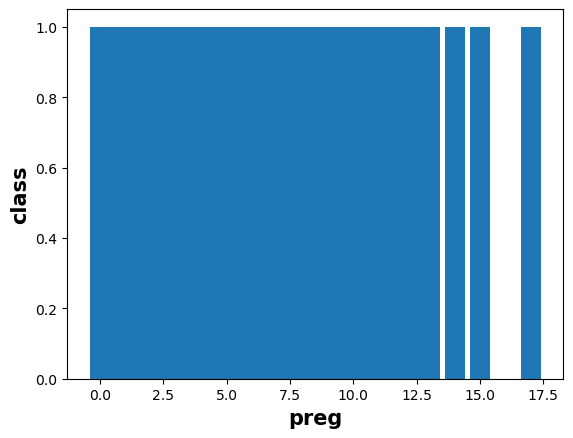

In [15]:
#BarPlot
plt.bar(data['preg'],data['class'])
plt.xlabel('preg', fontweight ='bold', fontsize = 15)
plt.ylabel('class', fontweight ='bold', fontsize = 15)

Text(0, 0.5, 'class')

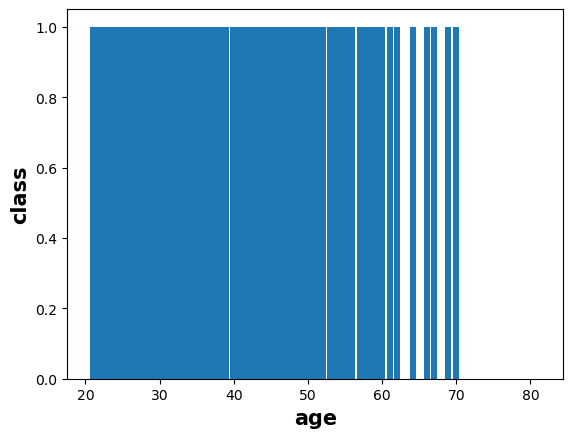

In [16]:
#BarPlot
plt.bar(data['age'],data['class'])
plt.xlabel('age', fontweight ='bold', fontsize = 15)
plt.ylabel('class', fontweight ='bold', fontsize = 15)

In [17]:
import warnings
warnings.filterwarnings("ignore")

# Pair Plot

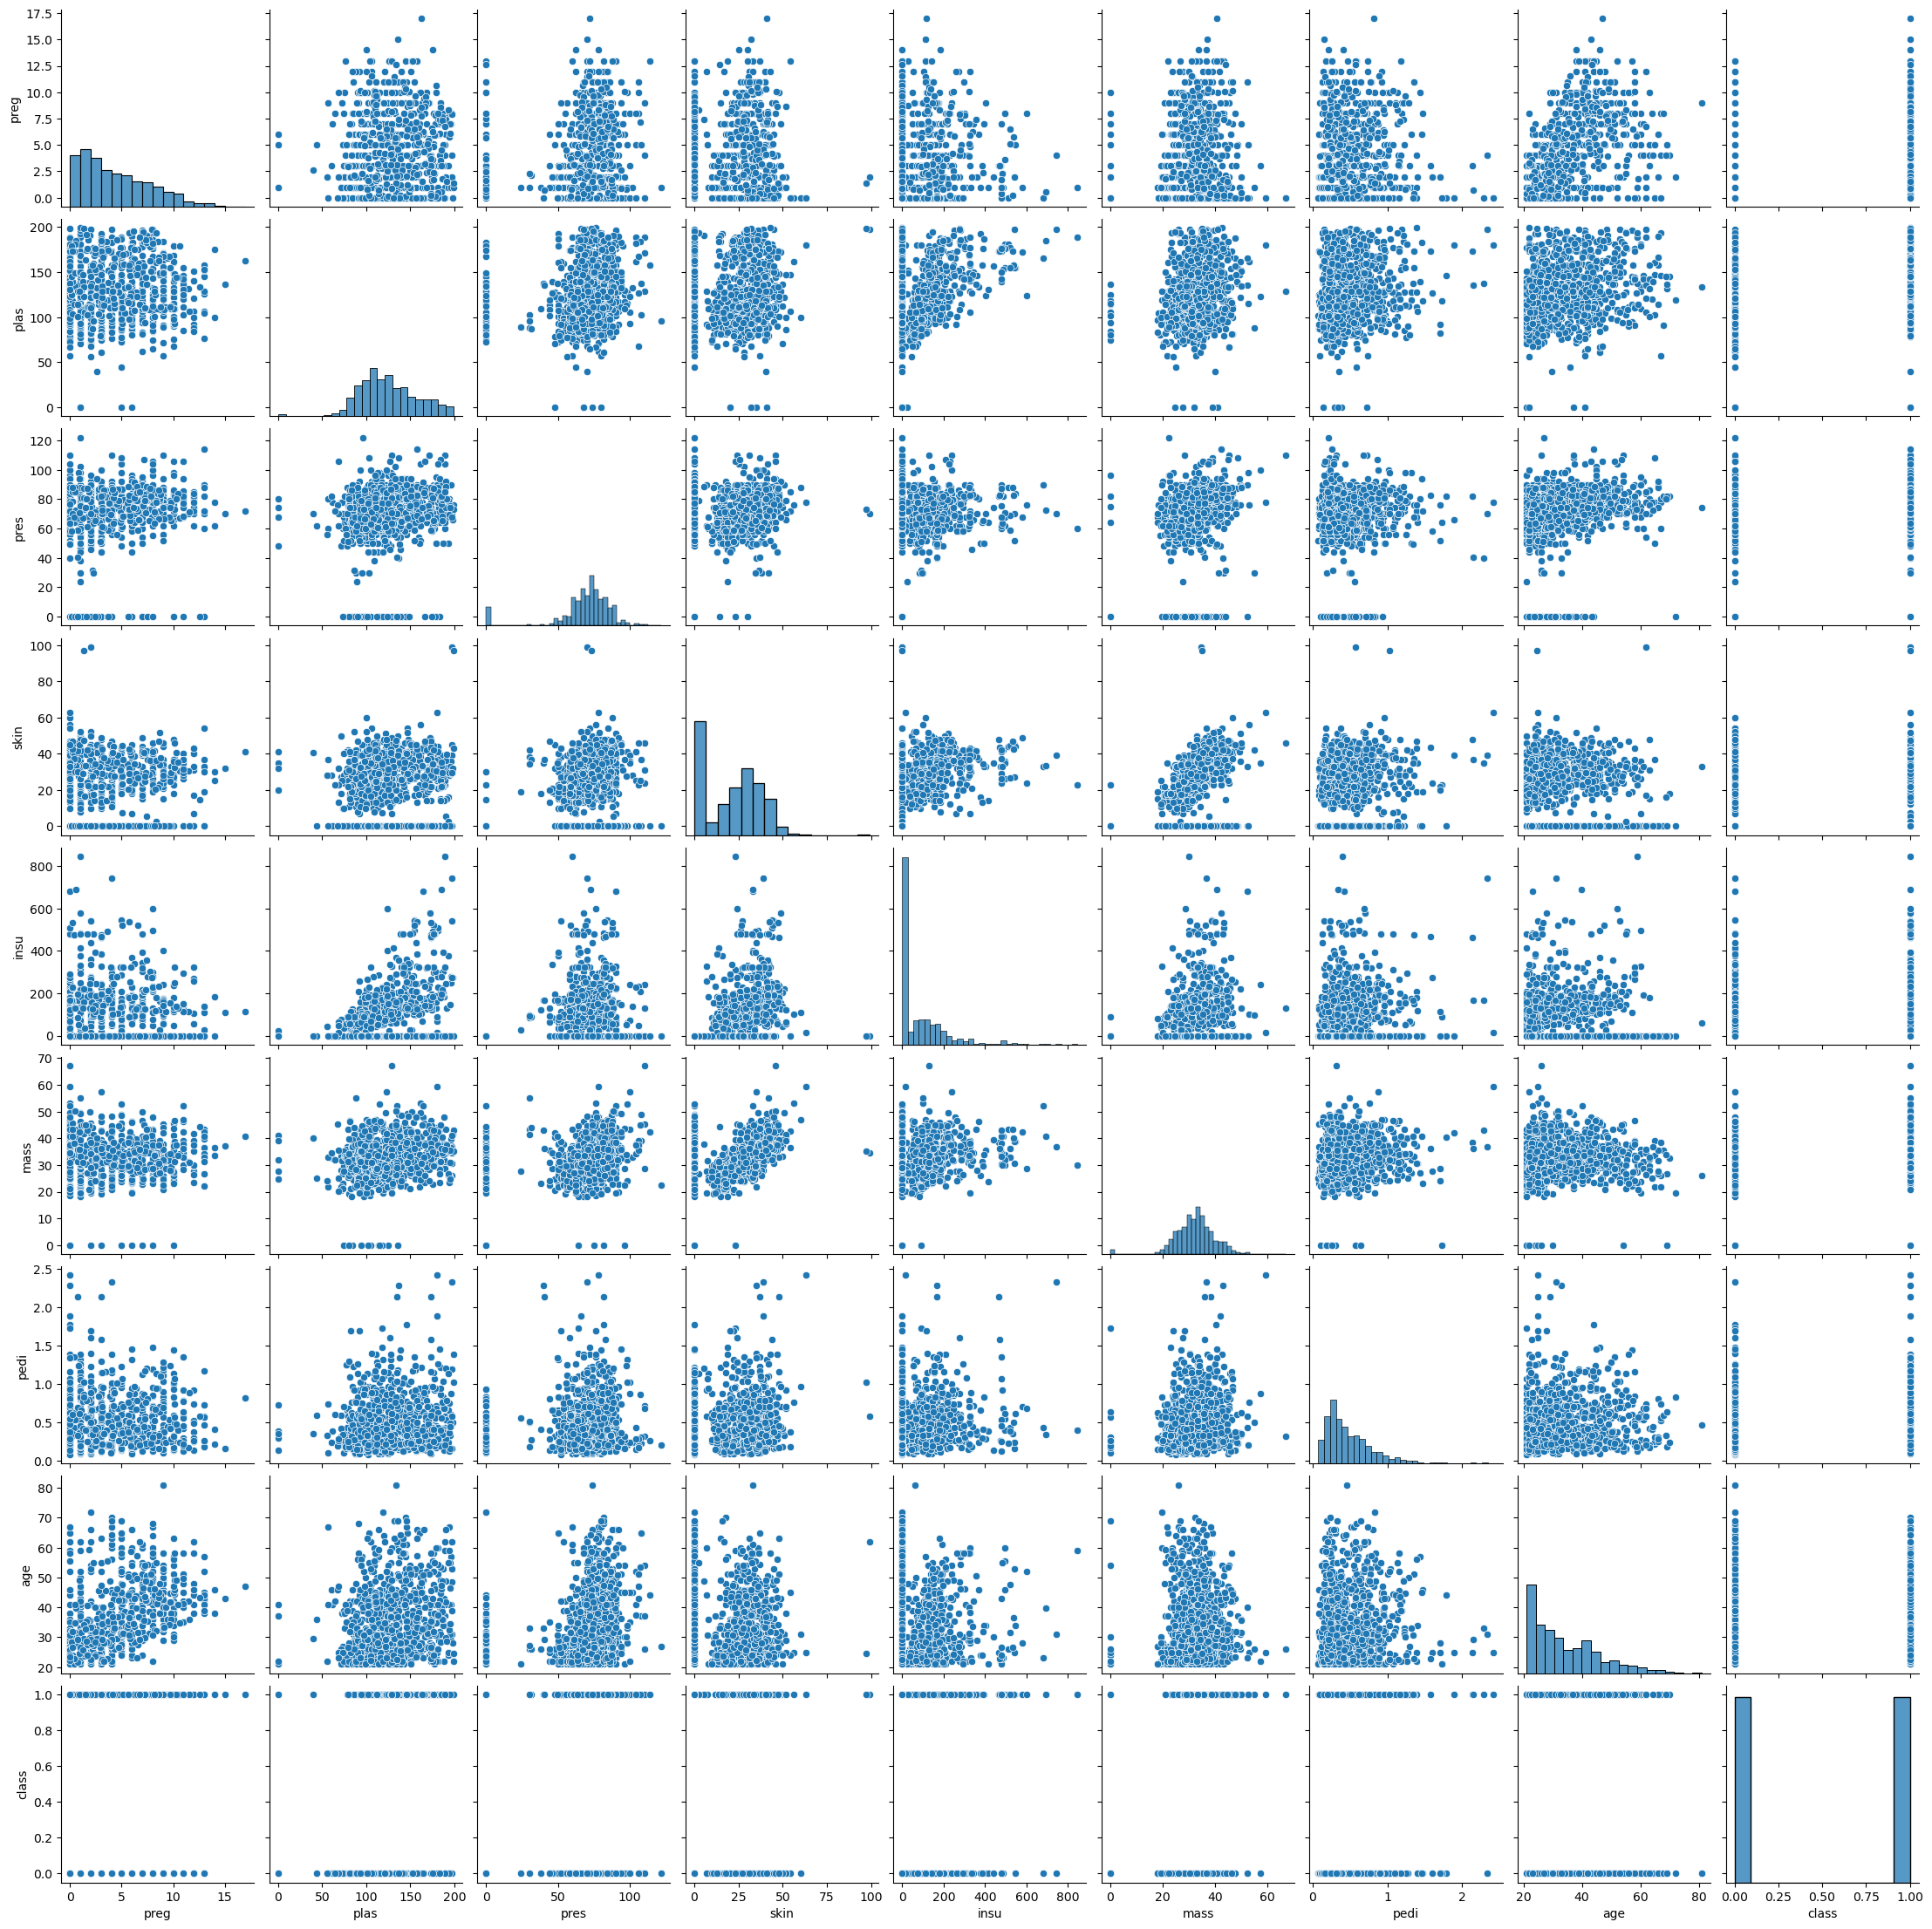

In [18]:
#Pair Plot
sns.pairplot(data)

# Heat Map

<Axes: >

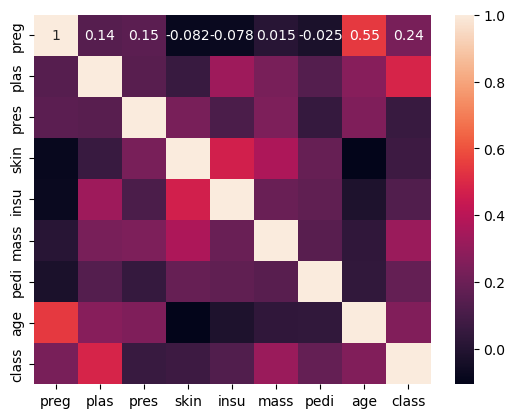

In [19]:
#Heat Map
hm=data.corr()
sns.heatmap(hm,annot=True)

In [20]:
#extracting numerical columns values
x_independent = data.iloc[:,:-1]
y_dependent=data.iloc[:,8:9]
x_independent

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.000000,148.000000,72.000000,35.000000,0.00000,33.600000,0.627000,50.000000
1,1.000000,85.000000,66.000000,29.000000,0.00000,26.600000,0.351000,31.000000
2,8.000000,183.000000,64.000000,0.000000,0.00000,23.300000,0.672000,32.000000
3,1.000000,89.000000,66.000000,23.000000,94.00000,28.100000,0.167000,21.000000
4,0.000000,137.000000,40.000000,35.000000,168.00000,43.100000,2.288000,33.000000
...,...,...,...,...,...,...,...,...
994,4.112680,128.273325,86.816247,40.561308,99.59885,35.405738,0.326197,36.960990
995,0.887431,128.536006,70.703019,0.000000,0.00000,35.695255,0.614867,48.963615
996,6.736276,189.134854,84.803245,0.000000,0.00000,35.755130,0.201246,61.978155
997,1.532892,164.001414,74.050966,33.355244,0.00000,44.879901,0.396190,32.674601


In [21]:
y_dependent

,class
0,1
1,0
2,1
3,0
4,1
...,...
994,1
995,1
996,1
997,1


# Removing Outliers

<Axes: >

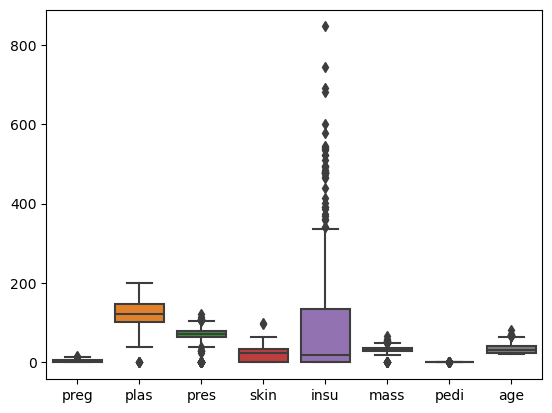

In [22]:
#Checking Outliers
sns.boxplot(x_independent)

# Scaling

In [23]:
name=x_independent.columns
name

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [24]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler

In [25]:
scale=MinMaxScaler()

In [26]:
X_scaled=scale.fit_transform(x_independent)

In [27]:
X=pd.DataFrame(X_scaled,columns=name)

In [28]:
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
994,0.241922,0.644590,0.711609,0.409710,0.117729,0.527656,0.105977,0.266017
995,0.052202,0.645910,0.579533,0.000000,0.000000,0.531971,0.229234,0.466060
996,0.396252,0.950426,0.695109,0.000000,0.000000,0.532863,0.052624,0.682969
997,0.090170,0.824128,0.606975,0.336922,0.000000,0.668851,0.135863,0.194577


# Split the data into dependent and independent variables

In [29]:
#independent values
x=X 
y=y_dependent

In [30]:
x

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
994,0.241922,0.644590,0.711609,0.409710,0.117729,0.527656,0.105977,0.266017
995,0.052202,0.645910,0.579533,0.000000,0.000000,0.531971,0.229234,0.466060
996,0.396252,0.950426,0.695109,0.000000,0.000000,0.532863,0.052624,0.682969
997,0.090170,0.824128,0.606975,0.336922,0.000000,0.668851,0.135863,0.194577


In [31]:
y

,class
0,1
1,0
2,1
3,0
4,1
...,...
994,1
995,1
996,1
997,1


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=6)

# Build the Model

In [35]:
x

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
994,0.241922,0.644590,0.711609,0.409710,0.117729,0.527656,0.105977,0.266017
995,0.052202,0.645910,0.579533,0.000000,0.000000,0.531971,0.229234,0.466060
996,0.396252,0.950426,0.695109,0.000000,0.000000,0.532863,0.052624,0.682969
997,0.090170,0.824128,0.606975,0.336922,0.000000,0.668851,0.135863,0.194577


# XGBOOST

In [36]:
import xgboost as xgb

In [37]:
xg= xgb.XGBClassifier(n_estimators=100)

In [38]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
pred=xg.predict(x_test)

In [40]:
accuracy_score(y_test,pred)

0.856

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       122
           1       0.83      0.90      0.86       128

    accuracy                           0.86       250
   macro avg       0.86      0.85      0.86       250
weighted avg       0.86      0.86      0.86       250



# Gradient Boost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier()

model5.fit(x_train,y_train.values.ravel())

acc_score5 = model5.score(x_test, y_test)
print("model score: %.3f" % acc_score5)

y_pred5=model5.predict(x_test)

model score: 0.816


In [43]:
x_train.shape

(749, 8)

In [44]:
x_test.shape

(250, 8)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=2,max_depth=10)

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
#training the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=2)

In [49]:
#test the model
pred=rf.predict(x_test)

In [50]:
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [51]:
print(accuracy)

0.848


In [52]:
print(conmat)

[[ 95  27]
 [ 11 117]]


In [53]:
print(classification_report(y_test,pred))
# Calculate precision
# precision = precision(y_test, y_pred)
# print(f"Precision: {precision:.4f}")

# Calculate recall
# recall = recall(y_test, y_pred)
# print(f"Recall: {recall:.4f}")

# Calculate F1 score
# f1 = f1_score(y_test, y_pred)
# print(f"F1 Score: {f1:.4f}")

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       122
           1       0.81      0.91      0.86       128

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



# LogisticRegression

In [54]:
#Model Building
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
pred=lr.predict(x_test)

In [58]:
pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1])

In [59]:
pred1=lr.predict(x_train)

In [60]:
pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [61]:
accuracy_score(y_train,pred1)

0.7369826435246996

In [62]:
accuracy_score(y_test,pred)

0.788

# DecisionTree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
df=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [65]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [66]:
pred=df.predict(x_test)

In [67]:
accuracy_score(y_test,pred)

0.756

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier()

In [70]:
# training the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
# test the model
pred=knn.predict(x_test)

In [72]:
pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1])

In [73]:
y_test

,class
977,1
22,1
909,1
399,1
438,0
...,...
395,0
359,1
707,0
444,1


In [74]:
accuracy_score(y_test,pred)

0.796

In [75]:
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       122
           1       0.77      0.85      0.81       128

    accuracy                           0.80       250
   macro avg       0.80      0.79      0.79       250
weighted avg       0.80      0.80      0.80       250



# Ensemble Learning (Hybrid approach - RandomForest, KNN, XGBoost)

In [76]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=0)
xgb_model = XGBClassifier(n_estimators=50, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=50)

In [79]:
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [80]:
# Make predictions with individual models
rf_preds = rf_model.predict(x_test)
xgb_preds = xgb_model.predict(x_test)
knn_preds = knn_model.predict(x_test)

In [81]:
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('xgboost', xgb_model),
    ('knn', knn_model)], voting='hard')

In [82]:
# Train the ensemble model
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=0)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            g...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                             ('knn', KNeighborsClassifier(n_neighbors=50))])

In [83]:
# Make predictions with the ensemble model
ensemble_preds = voting_clf.predict(x_test)

In [84]:
ensemble_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1])

In [85]:
# Evaluate the performance of individual models and the ensemble
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test,ensemble_preds))

Random Forest Accuracy: 0.844
XGBoost Accuracy: 0.848
KNN Accuracy: 0.764
Ensemble Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       122
           1       0.82      0.90      0.86       128

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



# LSTM

In [88]:
seed = 0
accuracy_scores = []

# for seed in range(2):
seed= 42

from tensorflow.keras.models import Sequential
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

x_train_num = num_pipeline.fit_transform(x_train)
x_test_num = num_pipeline.transform(x_test)


lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
lstm_model.fit(x_train_num, y_train, epochs=100, batch_size=32, validation_data=(x_test_num, y_test))

y_pred = (lstm_model.predict(x_test_num) > 0.5).astype(int)  # Assuming it's a binary classification task

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
    
   
y_pred_probabilities = lstm_model.predict(x_test_num)

y_pred = np.round(y_pred_probabilities).astype(int)

accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)

# for seed, accuracy in enumerate(accuracy_scores):
print(f"Seed {seed}: Accuracy = {accuracy:.2f}")

Epoch 1/100
24/24 [==============================] - 3s 29ms/step - loss: 0.6590 - accuracy: 0.6595 - val_loss: 0.5993 - val_accuracy: 0.7200
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6836 - val_loss: 0.5546 - val_accuracy: 0.7160
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5956 - accuracy: 0.6889 - val_loss: 0.5555 - val_accuracy: 0.7160
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5947 - accuracy: 0.6916 - val_loss: 0.5490 - val_accuracy: 0.7120
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5917 - accuracy: 0.6889 - val_loss: 0.5488 - val_accuracy: 0.7120
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.6969 - val_loss: 0.5507 - val_accuracy: 0.7040
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.7036 - val_loss: 0.5494 - val_accuracy: 0.7040
Epoch 8/100


# RNN

In [89]:
seed = 1
accuracy_scores3 = []
# for seed in range(42):
seed = 35
from tensorflow.keras.layers import SimpleRNN


rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(x_train.shape[1], 1)))
rnn_model.add(Dense(1, activation="sigmoid"))
rnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# rnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["precision"])
rnn_model.fit(x_train_num, y_train, epochs=100, batch_size=32, validation_data=(x_test_num, y_test))
y_pred = (rnn_model.predict(x_test_num) > 0.5).astype(int)  # Assuming it's a binary classification task

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

accuracy_scores3.append(accuracy)

# for seed, accuracy in enumerate(accuracy_scores3):
print(f"Seed {seed}: Accuracy = {accuracy:.2f}")

Epoch 1/100
24/24 [==============================] - 1s 15ms/step - loss: 0.5653 - accuracy: 0.7103 - val_loss: 0.4654 - val_accuracy: 0.7840
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7276 - val_loss: 0.4606 - val_accuracy: 0.8000
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.7490 - val_loss: 0.4602 - val_accuracy: 0.8000
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.7410 - val_loss: 0.4605 - val_accuracy: 0.8000
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7437 - val_loss: 0.4618 - val_accuracy: 0.8080
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7330 - val_loss: 0.4584 - val_accuracy: 0.7880
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4957 - accuracy: 0.7477 - val_loss: 0.4569 - val_accuracy: 0.8080
Epoch 8/100


# Comparison

In [90]:
accuracy_rf = 85
accuracy_xgb = 86
accuracy_LSTM = 82
accuracy_RNN = 96

tt_rf = 10
tt_xgb = 7
tt_lstm = 19
tt_rnn = 11

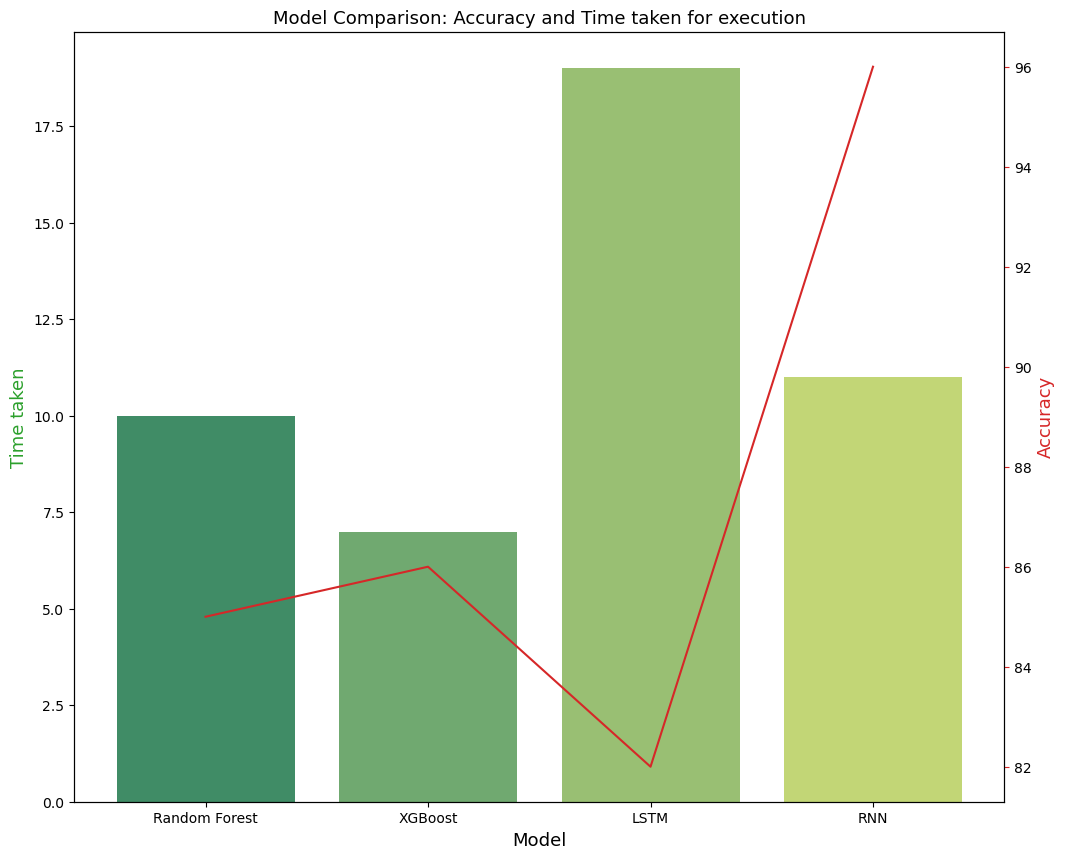

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the lengths of accuracy_scores and tt are the same
accuracy_scores = [accuracy_rf, accuracy_xgb, accuracy_LSTM, accuracy_RNN]
tt = [tt_rf, tt_xgb, tt_lstm, tt_rnn]

# Remove duplicate 'GRU' entry
model_data = {'Model': ['Random Forest', 'XGBoost','LSTM', 'RNN',],
              'Accuracy': accuracy_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)

color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)

# Use barplot for time taken
ax2 = sns.barplot(x='Model', y='Time taken', data=data, palette='summer')
ax1.tick_params(axis='y')

# Overlay lineplot for accuracy
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data=data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

plt.show()

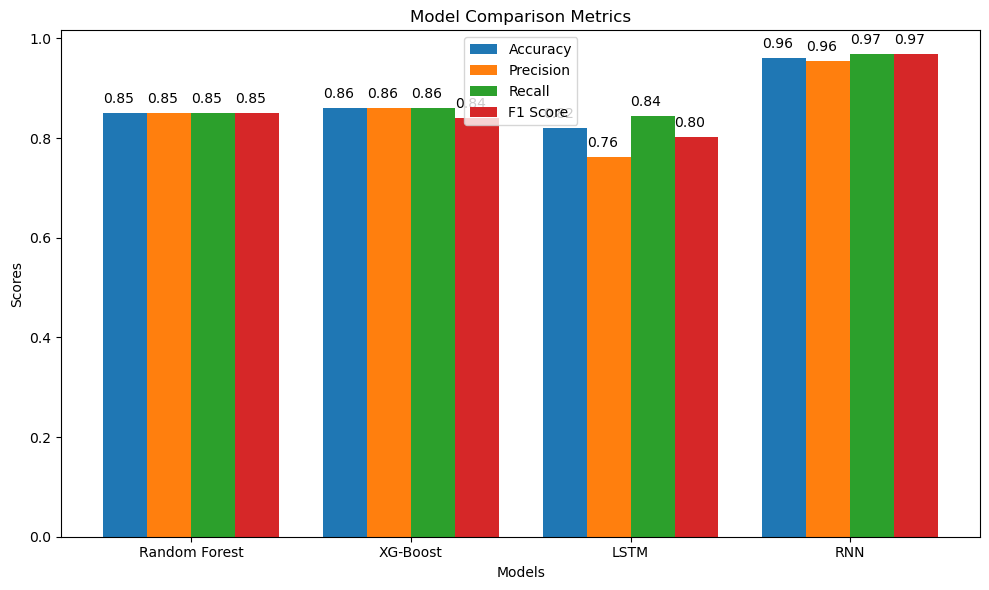

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for different models
model_names = ['Random Forest', 'XG-Boost','LSTM', 'RNN']
accuracy = [0.85,0.86,0.82,0.96]
precision = [0.85,0.86,0.7630,0.9554]
recall = [0.85,0.86,0.8443,0.9678]
f1_score = [0.85,0.84,0.8016,0.9678]

# Bar width
bar_width = 0.2

# Set up the bar positions
index = np.arange(len(model_names))

# Plot the bars
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = plt.bar(index + bar_width, precision, bar_width, label='Precision')
bar3 = plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
bar4 = plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Add numerical values on top of each bar
for i, acc in enumerate(accuracy):
    plt.text(i - 0.1, acc + 0.02, f'{acc:.2f}', color='black')
    plt.text(i + bar_width - 0.1, precision[i] + 0.02, f'{precision[i]:.2f}', color='black')
    plt.text(i + 2 * bar_width - 0.1, recall[i] + 0.02, f'{recall[i]:.2f}', color='black')
    plt.text(i + 3 * bar_width - 0.1, f1_score[i] + 0.02, f'{f1_score[i]:.2f}', color='black')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison Metrics')
plt.xticks(index + 1.5 * bar_width, model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# conclusion :
# After training our data with different models the evaluation metrics are:-
# Random Forest Accuracy: 0.844
# XGBoost Accuracy: 0.848
# KNN Accuracy: 0.764
# Ensemble Accuracy: 0.844
# Lstm Accuracy = 0.80
# Rnn Accuracy = 0.80
# So we can say that RandomForestRegressor,XGBoost works fine with early prediction of diabetes mellitus in pregnant woman.